In [82]:
# %pip install pandas
import pandas as pd

Ustawienie ziarna generatora.

In [83]:
GENERATOR_SEED = 308187

In [84]:
analysis_data = pd.read_csv('white_wine.csv', decimal=',', sep=';')
analysis_data

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,4
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,4
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,4
3,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,4
4,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3929,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,4
3930,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,4
3931,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,3
3932,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,4


Dane nie zawierają wartości nullowych, żadna kolumna nie jest typu object, co mogłoby wskazywać na niepoprawny typ, ze względu na to, że wszystkie zmienne powinny być liczbami zmiennoprzecinkowymi.

In [85]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fixedacidity        3934 non-null   float64
 1   volatileacidity     3934 non-null   float64
 2   citricacid          3934 non-null   float64
 3   residualsugar       3934 non-null   float64
 4   chlorides           3934 non-null   float64
 5   freesulfurdioxide   3934 non-null   float64
 6   totalsulfurdioxide  3934 non-null   float64
 7   density             3934 non-null   float64
 8   pH                  3934 non-null   float64
 9   sulphates           3934 non-null   float64
 10  alcohol             3934 non-null   float64
 11  quality             3934 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 368.9 KB


Niektóre kolumny posiadają wartość 0, lecz nie świadczy to o błędnych danych - po prostu dane wino może nie zawierać danego składnika.

In [86]:
analysis_data.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
count,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000
mean,6.849797,0.279146,0.333622,6.459558,0.045601,35.439883,138.869853,0.994068,3.189156,0.489858,10.501906,3.862989
std,0.838729,0.102392,0.120268,5.134349,0.021445,17.244178,42.456374,0.003028,0.152655,0.114667,1.226966,0.887400
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.720000,0.220000,8.000000,1.000000
25%,6.300000,0.210000,0.260000,1.700000,0.036000,23.000000,108.250000,0.991753,3.090000,0.410000,9.500000,3.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,4.000000
75%,7.300000,0.320000,0.390000,10.100000,0.050000,46.000000,168.000000,0.996200,3.280000,0.550000,11.400000,4.000000
max,11.800000,1.100000,1.000000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.050000,7.000000


1752 wiersze z 3934 posiadają `quality` 4, zatem naiwny model dla każdego wina mógłby zwracać jakość 4, co dałoby (1752 / 3934) ~ 45% trafności.

In [87]:
analysis_data['quality'].value_counts()

quality
4    1752
3    1185
5     704
2     141
6     130
1      17
7       5
Name: count, dtype: int64

Macierz korelacji, pokazuje że największy wpływ na zmienną celu - `quality` ma zawartość alkoholu - wraz z wzrostem alkoholu w winie rośnie jakość. Drugim w kolejności atrybutem wpływającym na `quality` jest `density`, w tym przypadku jest jednak odwrotnie - wraz ze spadkiem gęstości wina, rośnie jakość. Trzecią mającą taki sam wpływ na zmienną celu jak gęstość, czyli ujemną korelację jest zawartość chlorków w winie.<br>
Z predyktorów usunięte zostają `citricacid`, `freesulfurdioxide`, `sulphates`, ponieważ mają znikomy wpływ na jakość wina i mogą zaburzać działanie sieci neuronowych.

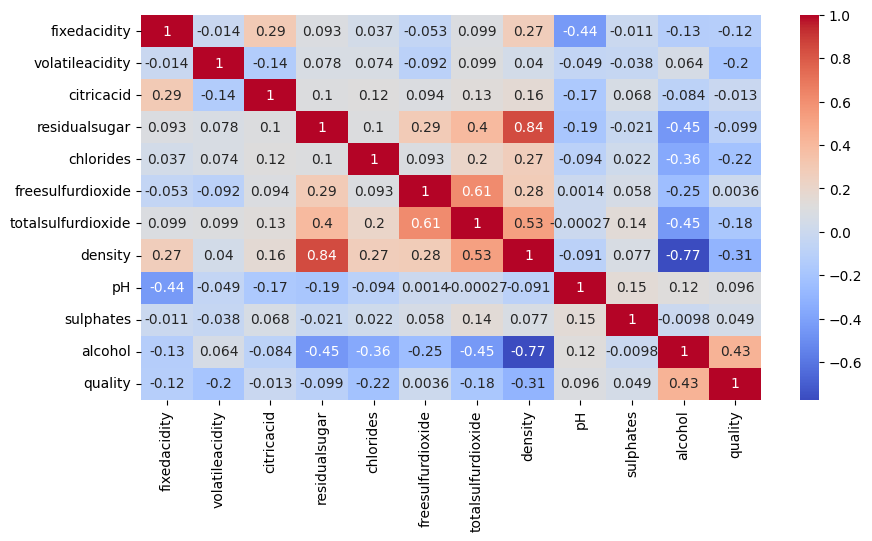

In [88]:
# %pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
correlation_matrix = analysis_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Przeanalizowane dane zostają kopiowane do zmiennej `data`.

In [89]:
data = analysis_data.drop(columns=['citricacid', 'freesulfurdioxide', 'sulphates'])
data

,fixedacidity,volatileacidity,residualsugar,chlorides,totalsulfurdioxide,density,pH,alcohol,quality
0,7.0,0.270,20.70,0.045,170.0,1.00100,3.00,8.8,4
1,6.3,0.300,1.60,0.049,132.0,0.99400,3.30,9.5,4
2,8.1,0.280,6.90,0.050,97.0,0.99510,3.26,10.1,4
3,8.1,0.280,6.90,0.050,97.0,0.99510,3.26,10.1,4
4,6.2,0.320,7.00,0.045,136.0,0.99490,3.18,9.6,4
...,...,...,...,...,...,...,...,...,...
3929,4.9,0.235,11.75,0.030,118.0,0.99540,3.07,9.4,4
3930,6.2,0.210,1.60,0.039,92.0,0.99114,3.27,11.2,4
3931,6.6,0.320,8.00,0.047,168.0,0.99490,3.15,9.6,3
3932,6.5,0.240,1.20,0.041,111.0,0.99254,2.99,9.4,4


Podział na predyktory i zmienną celu.

In [90]:
X = data.drop(columns=['quality'])
y = data['quality']

Podział na dane uczące i testowe.

In [91]:
# %pip install scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=GENERATOR_SEED, stratify=y)

Utworzenie listy z nazwami kolumn predyktorów.

In [128]:
from sklearn.compose import make_column_selector

sel_num = make_column_selector(dtype_include=['float64'])

In [129]:
sel_num(X)

['fixedacidity',
 'volatileacidity',
 'residualsugar',
 'chlorides',
 'totalsulfurdioxide',
 'density',
 'pH',
 'alcohol']

Normalizacja danych do przedziału <-1; 1>, wszystkie dane są liczbowe, zatem nie trzeba ich encodować.

In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

preprocesor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(feature_range=(-1, 1)), sel_num)
    ]
)

Przy użyciu Pipeline tworzona jest "lista kroków" jaka ma się wykonać, w tym przypadku, najpierw z wyżej utworzonego preprocesora przekształcane są dane, a nastepnie przy użyciu MLPClassifier tworzy się klasyfikator oparty na sieci neuronowej.

Parametr max_iter=250, został dostosowany ze względu na dość mały zbiór oraz "nieprzeuczającą" się sieć.
Parametr learning_rate='adaptive' został dobrany, ze względu na dynamiczne dostosowywanie współcznika uczenia, co we współpracy, ze zwiększoną max_iter, znajduje równowagę między najeefektywniejszym nauczeniem sieci, tak by jej nie przeuczyć.


In [95]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=GENERATOR_SEED, max_iter=250, learning_rate='adaptive')
pipeline = Pipeline(
    steps=[
        ('prep', preprocesor),
        ('siec', mlp_classifier)
    ]
)

Przekształcenie zbioru uczącego oraz "uczenie" sieci neuronowej.

In [ ]:
pipeline.fit(X_train, y_train)

Funkcja licząca trafność z tolerancją +-1.

In [97]:
def calculate_accuracy_within_tolerance(y_true, y_pred, tolerance=1):
    sum = 0

    for true, pred in zip(y_true, y_pred):
        if (pred - tolerance) <= true <= (pred + tolerance):
            sum += 1
    
    return (sum / len(y_true))

Funkcja wyświetlająca informację o ocenie jakości modelu.

In [98]:
from sklearn.metrics import accuracy_score, mean_absolute_error

def evaluate_model(y_true, y_pred, digits=3):
    print("Trafność:", round(100 * accuracy_score(y_true, y_pred), 3), "\b%")
    print("Trafność z tolerancją (+-1):", round(100 * calculate_accuracy_within_tolerance(y_true, y_pred), digits), "\b%")
    print("Średni błąd bezwzględny:", round(mean_absolute_error(y_true, y_pred), digits))

Model radzi sobie średnio - 54.455% trafności, zachowuje się jednak lepiej niż naiwny model dla tego problemu. Jednak gdy spojrzymy na trafność z tolerancją +-1, można powiedzieć, że model radzi sobie znakomicie - 94.666%. Średni błąd bezwzględny wynosi: 0.515. Na podstawie tych 3 wyników, można wywnioskować, że model z dokładnym przewidzeniem jakości, poradził sobie przeciętnie, jednak trafność z tolerancją jak i średni błąd bezwzględny, pokazuje że model radzi sobie bardzo dobrze z przybliżoną oceną jakości.

In [99]:
y_test_pred = pipeline.predict(X_test)

evaluate_model(y_test, y_test_pred)

Trafność: 54.445%
Trafność z tolerancją (+-1): 94.666%
Średni błąd bezwzględny: 0.515


Utworzenie pliku ze zbiorem uczącym z kolumnami `true` - prawdziwa jakość i `predicted` - przewidziana przez model jakość.

In [100]:
# predicted = X_test.copy()
# predicted['true'] = y_test
# predicted['predicted'] = y_test_pred
# predicted.to_csv('classification_test_set.csv', index=False)
# predicted

# Regresja

Parametry `max_iter` i `learnig_rate` zostały dobrane tak samo jako dla `MLPClassifier`, aby modele pracowały na takich samych ustawieniach.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=GENERATOR_SEED, max_iter=250, learning_rate='adaptive')

pipeline_regression = Pipeline(
    steps=[
        ('prep', preprocesor),
        ('siec', mlp_regressor)
    ]
)

Uczenie modelu na danych uczących.

In [ ]:
pipeline_regression.fit(X_train, y_train)

`Trafność`: 52.752%<br>
`Trafność z tolerancją`: 95.428%<br>
`Średni błąd bezwzględny`: 0.522<br>
Różnica między dwoma modelami jest znikoma, ale istnieje. Pierwszą z różnic jest `Trafność` w modelu regresyjnym jest niższa o ok. 1.8 punkta procentowego. Wynika z tego, że `MLPClassifier` radzi sobie lepiej z dokładnym przewidzeniem jakości. Natomiast przy `Trafności z tolerancją +-1`, lepiej poradził sobie model regresyjny o ok. 0.9 punkta procentowego, co znaczy że `MLPRegressor` radzi sobie lepiej z przewidywaniem przybliżonego wyniku jakości. W przypadku `Średniego błędu bezwzględnego` jest to różnica 0.07 setnych, co świadczy że ogólnie modele radzą sobie z tym problemem na tym samym poziomie. Zależy jednak na czym nam zależy - na dokładnym przewidzeniu `quality`, czy też przybliżonym.

In [126]:
y_reg_test_pred = pipeline_regression.predict(X_test)

rounded_y_reg_test_pred = [round(y) for y in y_reg_test_pred]

evaluate_model(y_test, rounded_y_reg_test_pred)

Trafność: 52.752%
Trafność z tolerancją (+-1): 95.428%
Średni błąd bezwzględny: 0.522


Segment tworzący plik z zbiorem testowym wraz z kolumną `true` - prawdziwa wartość `quality` i `predicted` - przewidziana przez model `quality` zaokrąglona do 3 miejsc po przecinku.

In [130]:
# predicted_regression = X_test.copy()
# predicted_regression['true'] = y_test
# rounded = [round(y, 3) for y in y_reg_test_pred]
# predicted_regression['predicted'] = rounded
# predicted_regression.to_csv('regression_test_set.csv', index=False)
# predicted_regression

In [105]:
# X_train.to_csv('regression_training_set.csv', index=False)
# X_test.to_csv('regression_test_set.csv', index=False)